# <center>**SES 722 : TP n°7 Économétrie**</center>


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
import statsmodels.api as sm

In [47]:
plt.style.available
# https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

['tableau-colorblind10',
 'seaborn-bright',
 'seaborn-poster',
 'ggplot',
 'seaborn',
 'seaborn-muted',
 'seaborn-dark-palette',
 'fast',
 'seaborn-darkgrid',
 'seaborn-talk',
 'Solarize_Light2',
 'classic',
 'fivethirtyeight',
 'bmh',
 'seaborn-pastel',
 'seaborn-deep',
 'seaborn-notebook',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'seaborn-dark',
 'seaborn-paper',
 'grayscale',
 'dark_background',
 '_classic_test',
 'seaborn-white',
 'seaborn-colorblind']

## **Exercice 1 :**
On utilise la base de données `barium.raw`. Représenter graphiquement la série d’importations. Discuter la stationnarité.

In [48]:
df = pd.read_csv('textfiles/BARIUM.raw', delim_whitespace=True, header=None)
# voir FERTIL3.DES (description) pour description des données

columns = ['chnimp', 'bchlimp', 'befile6', 'affile6', 'afdec6', 'befile12', 'affile12', 'afdec12', 
           'chempi', 'gas', 'rtwex', 'spr', 'sum', 'fall', 'lchnimp', 'lgas',     
           'lrtwex', 'lchempi', 't', 'feb', 'mar', 'apr', 'may', 'jun',      
           'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'percchn']  

df.rename(columns={i : columns[i] for i in range(len(columns))},
          inplace=True)

BARIUM.DES
  
  
| Header 1 | Header 2 | Header 3 |
|----------|----------|----------|
| 1.       | chnimp   | Chinese imports, bar. chl. |
| 2.       | bchlimp  | total imports bar. chl. |
| 3.       | befile6  | =1 for all 6 mos before filing | 
| 4.       | affile6  | =1 for all 6 mos after filing |
| 5.       | afdec6   | =1 for all 6 mos after decision |
| 6.       | befile12 | =1 all 12 mos before filing |
| 7.       | affile12 | =1 all 12 mos after filing |
| 8.       | afdec12  | =1 all 12 mos after decision |
| 9.       | chempi   | chemical production index |
| 10.      | gas      | gasoline production |
| 11.      | rtwex    | exchange rate index |
| 12.      | spr      | =1 for spring months |
| 13.      | sum      | =1 for summer months |
| 14.      | fall     | =1 for fall months |
| 15.      | lchnimp  | log(chnimp) |
| 16.      | lgas     | log(gas) |
| 17.      | lrtwex   | log(rtwex) |
| 18.      | lchempi  | log(chempi) |
| 19.      | t        | time trend |
| 20.      | feb      | =1 if month is feb |
| 21.      | mar      | =1 if month is march |
| 22.      | apr      | ... |
| 23.      | may      | ... |
| 24.      | jun      | ... |
| 25.      | jul      | ... |
| 26.      | aug      | ... |
| 27.      | sep      | ... |
| 28.      | oct      | ... |
| 29.      | nov      | ... |
| 30.      | dec      | ... |
| 31.      | percchn  | % imports from china |


In [49]:
df.head()

,chnimp,bchlimp,befile6,affile6,afdec6,befile12,affile12,afdec12,chempi,gas,...,apr,may,jun,jul,aug,sep,oct,nov,dec,percchn
0,220.4620,9578.376,0,0,0,0,0,0,100.1,7.830000e+09,...,0,0,0,0,0,0,0,0,0,2.301664
1,94.7980,11219.480,0,0,0,0,0,0,100.9,8.830000e+09,...,0,0,0,0,0,0,0,0,0,0.844941
2,219.3575,9719.900,0,0,0,0,0,0,101.1,8.460000e+09,...,1,0,0,0,0,0,0,0,0,2.256788
3,317.4215,12920.950,0,0,0,0,0,0,102.5,9.240000e+09,...,0,1,0,0,0,0,0,0,0,2.456642
4,114.6390,9790.446,0,0,0,0,0,0,104.1,9.150000e+09,...,0,0,1,0,0,0,0,0,0,1.170927


In [50]:
df.describe()

,chnimp,bchlimp,befile6,affile6,afdec6,befile12,affile12,afdec12,chempi,gas,...,apr,may,jun,jul,aug,sep,oct,nov,dec,percchn
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,1.310000e+02,...,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,589.236996,19157.173206,0.045802,0.045802,0.045802,0.091603,0.091603,0.091603,122.831298,8.525344e+09,...,0.083969,0.083969,0.083969,0.083969,0.083969,0.083969,0.083969,0.083969,0.083969,3.272603
std,349.541554,7481.549970,0.209857,0.209857,0.209857,0.289572,0.289572,0.289572,14.235082,5.603547e+08,...,0.278407,0.278407,0.278407,0.278407,0.278407,0.278407,0.278407,0.278407,0.278407,1.985512
min,39.683000,8302.168000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.100000,6.960000e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172642
25%,317.881000,13765.315000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.600000,8.210000e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.805929
50%,535.718000,17716.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.200000,8.520000e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.782447
75%,821.356750,23646.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131.850000,8.870000e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.249462
max,1794.516000,45716.610000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,159.000000,1.020000e+10,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.232610


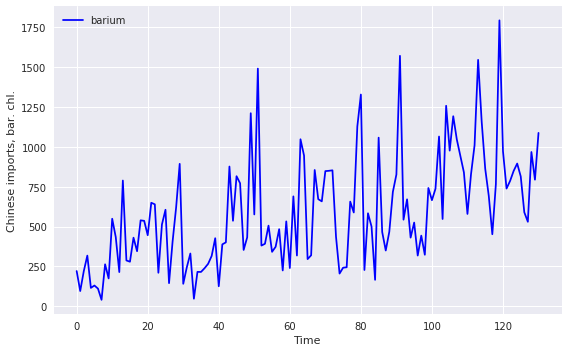

In [51]:
barium = df['chnimp']

plt.figure(figsize=(8,5))
plt.plot(barium, '-', label='barium', color='blue')
plt.xlabel('Time')
plt.ylabel('Chinese imports, bar. chl.')
plt.legend()
plt.tight_layout()
plt.show()

## **Exercice 2 :**
Retirer une tendance linéaire par régression OLS et représenter la série ajustée à la tendance `o1`.

In [52]:
n = len(barium)
const = np.ones(n)
t = df['t']

col = {'const':const, 't':t} 
X = pd.DataFrame(data=col)
y = barium

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 chnimp   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     58.61
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           3.97e-12
Time:                        15:48:01   Log-Likelihood:                -928.06
No. Observations:                 131   AIC:                             1860.
Df Residuals:                     129   BIC:                             1866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.5563     51.136      4.880      0.0

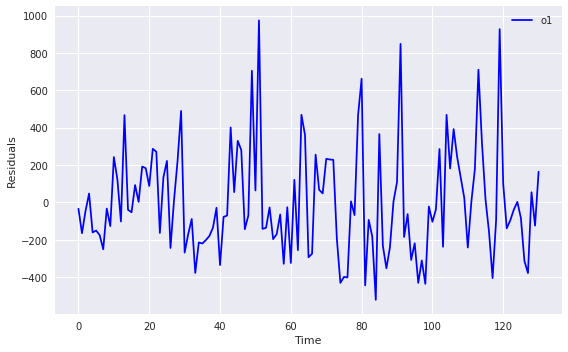

In [53]:
o1 = results.resid

plt.figure(figsize=(8,5))
plt.plot(o1, '-', label='o1', color='blue')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()

> `o1` est la série linéaire ajustée sur la tendance.

## **Exercice 3 :**
Calculer la moyenne mobile d’ordre 12 centrée et faire un graphique de la série ajustée `o2`. Refaire ensuite une moyenne mobile d’ordre 2 et ajuster la série pour cette tendance. Faire un graphique de la série ajustée `o3`.

Utiliser la commande `rolling` de ***textpanda*** : "*Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends. You can read more about them [here](https://en.wikipedia.org/wiki/Moving_average).* 

[source](https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=9)

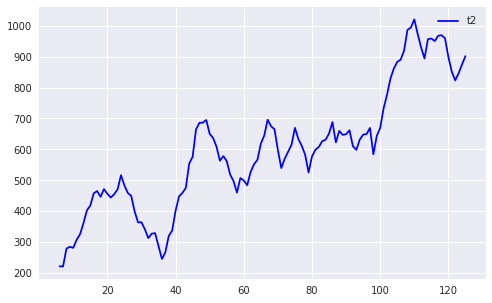

In [54]:
t2 = barium.rolling(window=12, center=True).mean()

plt.figure(figsize=(8,5))
plt.plot(t2, '-', label='t2', color='blue')
plt.legend()
plt.show()

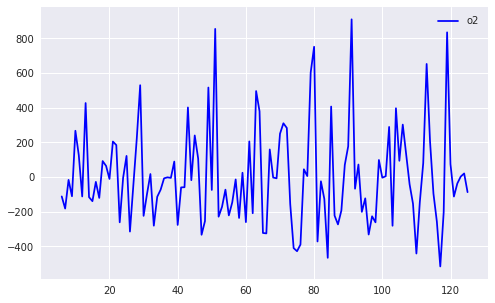

In [55]:
o2 = barium - t2

plt.figure(figsize=(8,5))
plt.plot(o2, '-', label='o2', color='blue')
plt.legend()
plt.show()

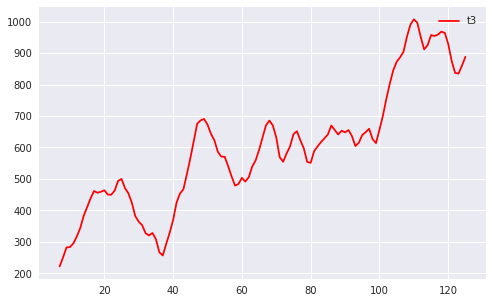

In [56]:
t3 = t2.rolling(window=2, center=True).mean()

plt.figure(figsize=(8,5))
plt.plot(t3, '-', label='t3', color='red')
plt.legend()
plt.show()

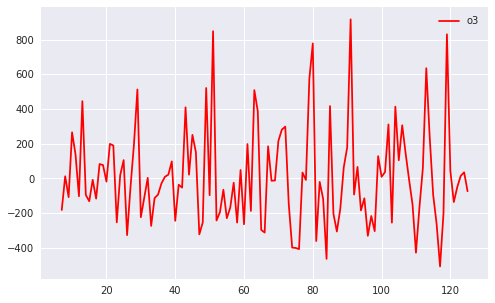

In [57]:
o3 = barium - t3

plt.figure(figsize=(8,5))
plt.plot(o3, '-', label='o3', color='red')
plt.legend()
plt.show()

## **Exercice 4 :**
A partir de la série `o1`, retirer les effets saisonnier par régression linéaire en prenant en
compte des variables binaires pour les mois.

In [58]:
n = len(o1)
const = np.ones(n)
t = df['t']

col = {'const':const, 'feb':df['feb'], 'mar':df['mar'], 'apr':df['apr'], 'may':df['may'], 
       'jun':df['jun'], 'jul':df['jul'], 'aug':df['aug'], 'sep':df['sep'], 
       'oct':df['oct'], 'nov':df['nov'], 'dec':df['dec']}

X = pd.DataFrame(data=col)
y = o1

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9835
Date:                Fri, 20 Mar 2020   Prob (F-statistic):              0.465
Time:                        15:48:04   Log-Likelihood:                -922.36
No. Observations:                 131   AIC:                             1869.
Df Residuals:                     119   BIC:                             1903.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.7533     91.721      0.619      0.5

> On constate un effet limite saisonnier en Avril.

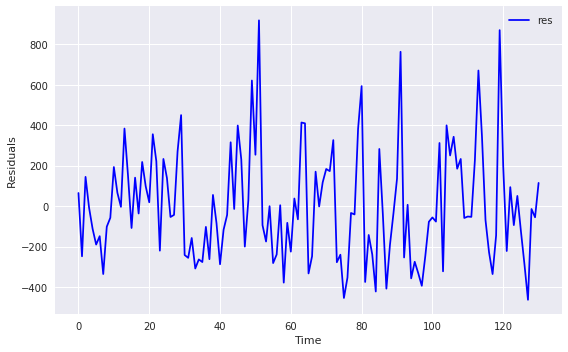

In [59]:
res = results.resid

plt.figure(figsize=(8,5))
plt.plot(res, '-', label='res', color='blue')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()

## **Exercice 5 :**
A partir de la série `o3`, calculer l’effet saisonnier par moyenne mobile $3 \times 3$. Ajuster la
série de cet effet saisonnier et faire un graphique.

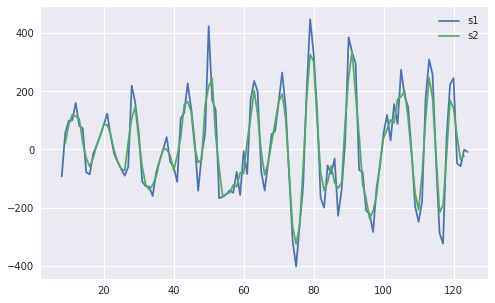

In [60]:
s1 = o3.rolling(window=3, center=True).mean()
s2 = s1.rolling(window=3, center=True).mean()

plt.figure(figsize=(8,5))
plt.plot(s1, '-', label='s1')
plt.plot(s2, '-', label='s2')
plt.legend()
plt.show()

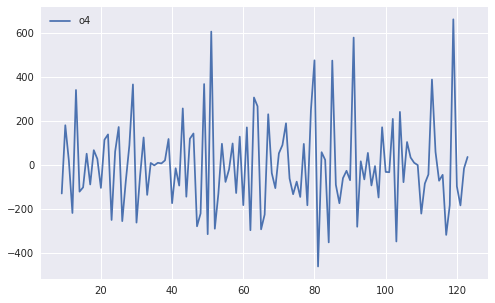

In [63]:
o4 = o3 - s2

plt.figure(figsize=(8,5))
plt.plot(o4, '-', label='o4')
plt.legend()
plt.show()

## **Exercice 6 :**
Faire le test de racine unitaires de la série barium avec 1 délai et avec 4 délais. Utiliser ensuite le critère AIC pour déterminer le nombre de lags.
$$
\text{AIC} = \text{erreur de prévision} + \text{pénalité} (p, q)
$$

Utiliser la commande `adfuller`.

In [70]:
from statsmodels.tsa.stattools import adfuller

adf_barium1 = adfuller(barium, maxlag=1, autolag=None)
print(adf_barium1)

(-4.822757860318834, 4.918852703994065e-05, 1, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275})


> On constate que la p-valeur est de l'ordre de $10^{-5}$ environ.

In [71]:
adf_barium4 = adfuller(barium, maxlag=4, autolag=None)
print(adf_barium4)

(-3.1039293840663507, 0.026263759786948917, 4, 126, {'1%': -3.4833462346078936, '5%': -2.8847655969877666, '10%': -2.5791564575459813})


In [67]:
adf_barium_aic = adfuller(barium, autolag='AIC')
print(adf_barium_aic)

(-2.5469235389871057, 0.10447061436564953, 5, 125, {'1%': -3.4837793736959997, '5%': -2.88495387648, '10%': -2.579256976}, 1679.9327623473284)


## **Exercice 7 :**
Considérons le modèle :
$$
\textit{barium} = α + β_1\textit{chempi} + β_2\textit{gas} + β_3\textit{rtwex} + u
$$

Faire le test de Chow d’absence de changement de structure pour deux sous-périodes de tailles égales `(0:65; 66:130)`. Déterminer ensuite le point de rupture en faisant une boucle avec un taux de *trim* de 15% au début et à la fin de la période.

In [68]:
chempi = df['chempi']
gas = df['gas']
rtwex = df['rtwex']
n = len(barium)
const = np.ones(n)

col = {'const':const, 'chempi':chempi, 'gas':gas, 'rtwex':rtwex} 
X = pd.DataFrame(data=col)
y = barium

model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 chnimp   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     14.01
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           6.03e-08
Time:                        15:58:01   Log-Likelihood:                -933.87
No. Observations:                 131   AIC:                             1876.
Df Residuals:                     127   BIC:                             1887.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1318.3218    565.048     -2.333      0.0

In [69]:
u = results.resid
SSR = u.T@u
SSR

11933904.283981118

> Il faut ensuite réitérer pour calculer SSR1, SSR2 puis F (*cf. TPs précédents*).

In [96]:
y1 = y.iloc[:65]
X1 = X.iloc[:65, :]

model1 = sm.OLS(y1, X1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 chnimp   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.556
Date:                Fri, 20 Mar 2020   Prob (F-statistic):             0.0635
Time:                        16:33:27   Log-Likelihood:                -454.98
No. Observations:                  65   AIC:                             918.0
Df Residuals:                      61   BIC:                             926.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -819.2614   1120.222     -0.731      0.4

In [97]:
u1 = results1.resid
SSR1 = u1.T@u1
SSR1

4574483.766613876

In [98]:
y2 = y.iloc[65:]
X2 = X.iloc[65:, :]

model2 = sm.OLS(y2, X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 chnimp   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     3.142
Date:                Fri, 20 Mar 2020   Prob (F-statistic):             0.0314
Time:                        16:33:32   Log-Likelihood:                -473.36
No. Observations:                  66   AIC:                             954.7
Df Residuals:                      62   BIC:                             963.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.3457   1463.943     -0.024      0.9

In [101]:
u2 = results2.resid
SSR2 = u2.T@u2
SSR2

6556441.255778549

In [103]:
F = ((SSR - (SSR1 + SSR2))/(SSR1 + SSR2))*(n-8)/4
F

2.218289337515024